# TASKS


This notebook contains the four tasks for this module.  
Each task contains a different problem to solve, organized into separate and different sections for greater organization.

<u>The notebook structure</u> for each task contains the following sections:

1) **Task statement**  
   Includes the description of the task.
2) **Information about the task, explanation and approach used**  
   Here the information on the task is given in more detail, what theoretical elements it contains and how it will be carried out.  
3) **Resolution**  
   Here is the part of the code related to data analysis.
4) **Analysis results**  
   After the calculations, the conclusions and the data visualization part are established.
5) **References**  
   Links to the material used.

***

## Library Imports  

Since this document contains various tasks, I have chosen to import the libraries at the beginning of the document, for greater organization and efficiency in loading times.  

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats  
import warnings 

In [2]:
# To maintain the readability of the notebook, I remove the warnings that may appear.
warnings.filterwarnings("ignore")

## Task nº1 - Lady Tasting Tea

### Task statement

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

Would you accept two errors? Explain.

### Information about the task, explanation and approach used

This experiment presented as task number one is a variation on one of the many statistical problems contained in the book called "The Design of Experiments" which was written in 1935 by the English statistician **Ronald Fisher**, on the design of experiments and is considered a fundamental work in experimental design and in modern statistical science.

In this experiment, Fisher introduced the concept of the null hypothesis into the framework of hypothesis testing as part of his approach to the analysis of experiments.

This procedure can be applied in many contexts, and is a fundamental basis in statistics for making data-based decisions.

To understand the application of this theory in the experiment, I am going to indicate a brief description of the null hypothesis and its application to this case.

The null hypothesis (H₀) and the alternative hypothesis (H₁) are basic concepts used in inferential statistics for decision making.

We try to find evidence to support or refute assumptions or statements.

\begin{align*}
H_0 &: \theta = \theta_0 \\
H_1 &: \theta \neq \theta_0
\end{align*}

**Null hypothesis (H₀)**: It is the initial statement that is assumed to be true until proven otherwise.  
Applied to our experiment, it may consist of the assumption that the person drinking tea does not have any sixth sense, that is, that person guesses how that tea was prepared.

The **alternative hypothesis((H₁))** is the statement contrary to the null hypothesis, that is, it is what the experiment is trying to prove.  
In our example, the person has a gift that goes beyond good luck, he is quite a fortune teller.

To solve this problem, we can choose between the use of permutations or combinations, however I will opt for the use of combinations, since the problem establishes that the order of the cups is not important and the combinations are preferable because it is only interesting the selection of cups, not the order.  

The formula used for the combinations is the following:  

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$ 

where:  

"n" is the number of elements, and i this particular example is 12  
"k" is the number of selected elements,6 cups that have the milk first  
$\binom{n}{k}$ is the number of ways to choose "k" elements on a set of "n" elements

To evaluate the evidence against the null hypothesis, a concept called **p - value** is used.

If the p value meets the condition of being less than an arbitrarily imposed significance level, this is considered a statistically significant result and, therefore, allows us to reject the null hypothesis.  

The significance level "α" is a threshold that is chosen in advance before performing the experiment and is commonly set at 0.05 (5%).  
This means that a 5% probability of incorrectly rejecting the null hypothesis is accepted.

For the code part,I am going to use several functionalities of the python numpy library and the matplotlib library to more directly visualize the results of my analysis.

### Problem statement

1) For this experiment we have 12 cups of tea of  ​​which 6 have milk first and the remaining ones have tea first.
2) A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it.
3) Calculate the probability that the person guesses all the cups by chance. This is our null hypothesis(the person does not have any special skill).
4) Calculate the probability, assuming they have no special powers, that the person makes at most one error(correctly select 5 cups out of 6).
5) The order when guessing the cups is not important.

### Resolution

Numpy and matplotlib libraries are used for this task.  
Variables are now set and with them I calculate the combinations by calculating the probability that the person choose the correct 6 cups by chance

In [3]:
total_cups = 12
correct_cups = 6  # 6 cups that have the milk first

In [4]:
# Creation of factorial products for the calculation of combinations.
def combinations(n, k):
    return np.prod(np.arange(n - k + 1, n + 1)) // np.prod(np.arange(1, k + 1))

Using "n" and "k" instead of the variables we created at the beginning, I can modify the number of cups if I want.  
Now I calculate the total of possible combinations and the probability that the person has to choose the correct 6 in a row.

In [5]:
total_combinations = combinations(total_cups, correct_cups)
prob_correct = 1 / total_combinations
print(f"The number of possible combinations is : {total_combinations}")
print(f"The probability that they select the correct six cups: {prob_correct:.5f}")

The number of possible combinations is : 924
The probability that they select the correct six cups: 0.00108


That is, it gives us a probability of 0.108225% that it is correct when choosing the 6 cups among all the available combinations.  


To evaluate our hypothesis I use the p value mentioned above and compare it with the obtained result.  
  

If p < α I reject the null hypothesis  

As "p" in the example is 0,00108 and "α" is 0,05 that means 0,00108 < 0,05 **the null hypothesis would be rejected.**  

I reject the null hypothesis in favor of the alternative hypothesis, indicating that the person who tastes the teas has a special ability.


For the second part of the problem, it is stated that the person makes at most one error and that he does not have special skills, that is, that he chooses at least 5 cups correctly.  
Since it is one cup less, the probability will be greater, but I will have to calculate it to know if this time I reject the null hypothesis again.

In [6]:
# Give the number of ways in which 5 correct cups and 1 incorrect cup can be chosen
comb_5_correct = combinations(correct_cups, 5) * combinations(total_cups - correct_cups, 1) 
prob_5_correct = (comb_5_correct + 1) / total_combinations

The problem also asks if I could accept 2 errors, so I am going to calculate this new situation and then compare it with the previous one.

In [7]:
# Give the number of ways in which 4 correct cups and 2 incorrect cup can be chosen
comb_4_correct = combinations(correct_cups, 4) * combinations(total_cups - correct_cups, 2)
prob_4_correct = comb_4_correct / total_combinations

Now with the calculations done, tt's time to interpret the results.  

### Analysis results
A compilation of the results to establish which hypotheses are rejected or not.

In [8]:
print(f"The probability of selecting the correct six cups: {prob_correct:.5f}")
print(f"The probability of selecting 5 cups correctly with 1 error: {prob_5_correct:.5f}")
print(f"The probability of selecting 4 cups correctly with 2 errors : {prob_4_correct:.5f}")

The probability of selecting the correct six cups: 0.00108
The probability of selecting 5 cups correctly with 1 error: 0.04004
The probability of selecting 4 cups correctly with 2 errors : 0.24351


For the first option, I rejected the null hypothesis.  
For the second option, as 0.04004 < 0.05 I also reject the null hypothesis.  
For the last option,  0.24351 > 0.05 , so in this case the null hypothesis is not rejected.  
This means that it is possible for a participant who has no special skills to guess 4 cups correctly by chance.

For the first and second cases, the probability is very low, suggesting that the person does not have any special abilities.
However, for the third option, it is possible but not totally certain that by accepting 2 errors, the person has special abilities.  
I could consider accepting 2 errors with the probability of 24.351% but the fact that one has special powers is not conclusive.

Now I am going to use matplotlib to compare the probability of getting the cups correct with the different scenarios analyzed, that is, with 0, 1 or 2 errors.

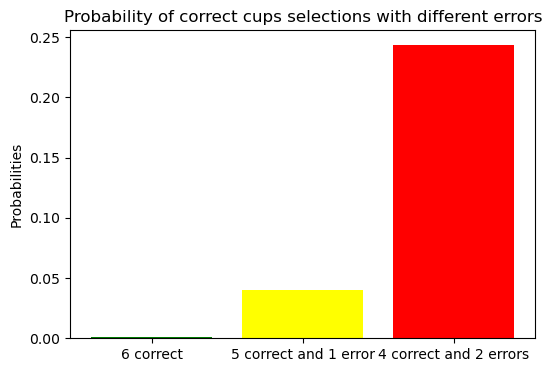

In [9]:
# Probabilities and labels for the graph
labels = ["6 correct", "5 correct and 1 error", "4 correct and 2 errors"]
probs = [prob_correct, prob_5_correct, prob_4_correct]

# Bar plot
plt.figure(figsize=(6, 4))
plt.bar(labels, probs, color=["green", "yellow", "red"])
plt.ylabel("Probabilities")
plt.title("Probability of correct cups selections with different errors")
plt.show()

This visualization tells us in a direct and concise way the enormous difference that exists between the 3 scenarios analyzed.

### References

https://numpy.org/devdocs/reference/generated/numpy.arange.html  
https://numpy.org/doc/stable/reference/generated/numpy.prod.html  

****

## Task nº2 - Normal Distribution

### Task statement

In this task you will assess whether `numpy.random.normal()` properly generates normal values.  
To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

### Information about the task, explanation and approach used

This task asks to use functionalities from the python library called numpy, which I  had used in the nº 1 task, applied to the normal probability distribution.  

The Normal Distribution is one of the most important probability distributions in statistics and has its name given its high frequency in natural phenomena, such as the height or weight of a population.  

It is also known as the "Bell curve" or "Gaussian bell" due to its characteristic shape, as it tends to group around a central value with a certain symmetry in its variations.  
Its key characteristics are its mean or average and the standard deviation, which tells us how wide or narrow the campaign is.  


These values ​​are parameters found in the density function, which indicates how the values ​​of a continuous variable are distributed, that is, how likely it is that the values ​​of a continuous variable fall into a certain interval.

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

μ is the mean of the distribution  
σ is the standard deviation  

This formula is useful for the Calculation of Probabilities in Intervals, for the prediction of probable values ​​or its use in probabilistic models, among other uses.

As I had mentioned, the use of this distribution is so common that for example it appears in popular culture such as the book Jurassic Park, written by Michael Crichton.  
In this book, the matematician Ian Malcom, after viewing some data collected from a computer, explains that while any healthy biological population typically presents a normal distribution, the created dinosaur population on the island should never follow that pattern , as the creators manipulated the values ​​by creating them artificially and in a controlled environment.   

### Problem statement

1) Check if the function numpy.random.normal() correctly generates normal values.  
2) A sample of one hundred thousand values ​​will be generated using the function with a mean of 10.0 and a standard deviation of 3.0.  
3) The scipy.stats.shapiro() function will be used to test if the sample comes from a normal distribution.  
4) A histogram of the generated values ​​must be created and overlaid with the probability density function of the corresponding normal distribution.


### Resolution

For the task, I use the numpy libraries, matplotlib.pyplot and scipy.stats, for the statistics part.

In [10]:
# Generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0
mean = 10.0
std_dev = 3.0
sample_size = 100000
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

In [11]:
# Test to check whether the sample came from a normal distribution
shapiro_test_stat, p_value = stats.shapiro(sample)

In [12]:
# Print the results
print("Shapiro Test:", shapiro_test_stat)
print("p-value:", p_value)

Shapiro Test: 0.9999801275185584
p-value: 0.9190535061892585


### Analysis results

The Shapiro test is very close to having a value of 1. Furthermore, the p value obtained is much higher than the usual value of 0.0, which suggests that the sample follows a normal distribution, a plausible and expected result since the function used to generate the sample is `np.random.normal`

The next part of the exercise asks you to make a graph of the sample and create a line corresponding to the density function of the superimposed normal distribution, in order to check its shape and how far it is from a perfect normal distribution.

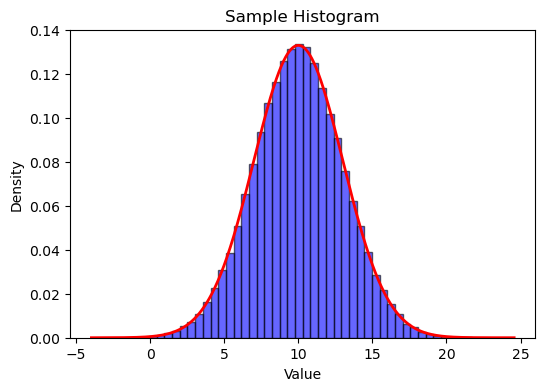

In [13]:
# Plot the histogram from the generated sample
plt.figure(figsize=(6, 4))
plt.hist(sample, bins=50, density=True, alpha=0.6, color="blue", edgecolor="black", label="Sample")

# Density curve interval
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = stats.norm.pdf(x, mean, std_dev)

# Combine both
plt.plot(x, p, "r", linewidth=2)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Sample Histogram")
plt.show()

As I mentioned before, the fit is almost perfect.
The combined plot clearly suggests that the sample generated through `np.random.normal` has a good fit to a normal distribution, given the mean and standard deviation. The data are distributed around the value 10 and the dispersion is 3 units around the mean.


### References

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html  
https://numpy.org/devdocs/reference/generated/numpy.linspace.html  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal  
https://docs.python.org/3/library/warnings.html#warnings.filterwarnings 


***

## Task nº3 - t-Test Calculation  

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program.  
| Patient ID | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|------------|----|----|----|----|----|----|----|----|----|----|
| Before     | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| After      | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |  


Calculate the t-statistic based on this data set, using Python. Compare it to the value given by `scipy.stats`. Explain your work and list any sources used.

### Information about the task, explanation and approach used

In the previous exercises, a slight introduction has been given to the elements used in statistical inference, such as the normal distribution and hypothesis testing.
Now, for this exercise we present the t-statistic, which is a value that serves as a test to know if the difference between the response of two groups is statistically significant or not.  

This statistic is based on the student t distribution, which shares similarities with the normal distribution, since both are continuous, have a bell shape or their standardized mean is equal to 0, however the tails or edges of the t distribution are more coarse, due to the additional uncertainty generated by the lack of knowledge of the sample variance.  

Having already used the normal distribution, the t distribution is used for this assumption since the sample is much smaller and the population variance is unknown.  

The general formula is the following:

$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

#### Where:
- $t$ :Student's t statistic.
- $\bar{x}$ :Sample mean.
- $\mu$ :Population mean (Using the null hypothesis).
- $s$ :Sample Standard deviation.
- $n$ :Sample size.  

This formula is not comparing pairs of data, but rather the sample against a fixed value.  

Because of this, for the data offered it is better to use the t-statistic for related samples,which formula is the following:

$$
t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}
$$

#### Where:
- $t$ :Value of the t-statistic.
- $\bar{d}$ :Mean of the differences
- $s_d$ :Standard deviation of the differences
- $n$  Number of paired data points.

### Problem statement  

1) Compare the heart rate data of a group of 10 people. 
2) The program gives measurements before and after a physical training program.  
3) Therefore, faced with the two groups of observations, before and after, two arrays can be created to facilitate manipulation.
4) Differences must be calculated to obtain the rest of the necessary data.  
5) Finally alculate the t statistic to later compare it with the values ​​generated by scipy.stats.  
6) Compare results and conclusions.  

### Resolution  

The necessary libraries have already been imported at the beginning of the notebook, but I present a brief compilation to indicate what the purpose of each one is.  

`Numpy` I use it to create arrays of the data, one for the data grouped "before" and another for the data "after".  
`scipy.stats` Using this statistical library, the value to be compared of the statistic t will be directly calculated.  
`matplotlib.pyplot` To make graphs of the data obtained and help draw conclusions visually.  

In [14]:
# Creation of the two groups
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

# Checking the differences
difference = before - after  

# Calculate mean and standard desviation
mean_diff = np.mean(difference)
std_diff = np.std(difference) 

# Using the t formula for the related samples
n = len(difference)
t_stat_manual = mean_diff / (std_diff / np.sqrt(n))

print(t_stat_manual)

1.4095615314705645


Now that I have calculated t manually, I will use `scipy.stats.ttest_rel` that calculates both the value t and the p- value, which will be used later.

In [15]:
t_stat_scipy, p_value = stats.ttest_rel(before, after)
print(t_stat_scipy)

1.337227482480628


### Analysis results

Once the result of both has been calculated, it is time to compare it.  
The first result was obtained by manually calculating variables such as the mean and standard deviation and then applying it to the formula.
In the second case, it was calculated automatically with the corresponding functionality of the scipy library.

In [16]:
# Print the results
print(t_stat_manual)
print(t_stat_scipy)
difference_stats = t_stat_manual - t_stat_scipy 
print("The difference between the two measurements is:", difference_stats)

1.4095615314705645
1.337227482480628
The difference between the two measurements is: 0.07233404898993645


The difference is quite small between both calculations.
For this specific exercise where we calculate the difference between the heartbeats of a sample after a training program, this t value will help us decide if the exercise program was a determining factor for the subjects to reduce their heartbeats or it was all due to a product of chance.  

To really verify the above, I can establish a hypothesis, using the hypothesis test explained in the previous exercise.  
The hypotheses focus on whether the exercise program had a significant effect on the resting heart rates of the participants and will be found based on the means of the differences.  
I am going to use the two-tailed test approach for the hypothesis.

1) The null hypothesis declares that the exercise did not had any effect to the participants
$$H_0: \bar{d} = 0$$

2) The alternative hypothesis declares that the exercise had a significant effect by reducing the heart rate
$$H_1: \bar{d} \neq 0$$


Using again the p-value with a significance level of 5% (that is, the p-value is 0.05) implying a confidence level of 95%, I need to calculate the p- value associated with the value "t" in order to compare and check the hypothesis.  
I have previously calculated the t-statistic in two ways, apart from the associated p-value.  
I have the following as a t statistic and its associated p value:

In [17]:
# Print the results
print(f"The t-statistic is {t_stat_scipy:.3f} and its associated p-value is {p_value:.3f}.")

The t-statistic is 1.337 and its associated p-value is 0.214.


Comparing the result with a 5% significance level:

p= 0.213 > 0.05 : **The null hypothesis is not rejected.**

This indicates that with the result obtained there is not enough evidence to draw a solid and accurate conclusion that the 2-week exercise program has a significant change in the resting heartbeats of the participants.  

One way to visually see these few changes can be through the following graph, which indicates how the data varies before and after the exercise program. This graph will allow you to visualize how the data varies before and after the exercise program.

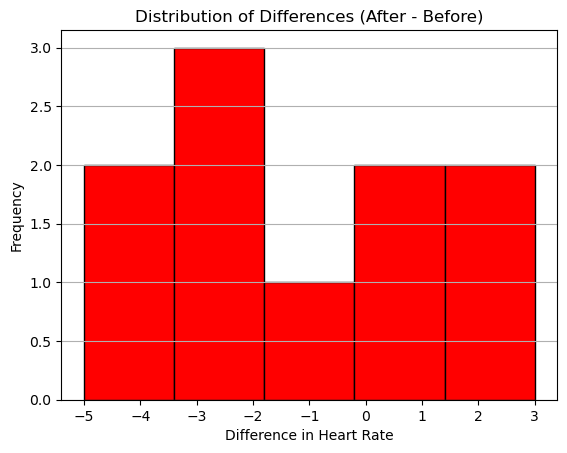

In [ ]:
# Compute differences
differences = np.array(after) - np.array(before)

# Plot histogram
plt.hist(differences, bins=5, color="red", edgecolor="black")
plt.title("Distribution of Differences (After - Before)")
plt.xlabel("Difference in Heart Rate")
plt.ylabel("Frequency")
plt.grid(axis="y")
plt.show()

This task shows us in a simplified way a small population and changes in resting heart rate after a training system and although the result cannot be verified, there are numerous studies where other health parameters such as VO2max, or the maximum amount of oxygen that the body can process,takes a lot of importance.

This parameter is a fundamental indicator of health, as indicated by the American Heart Association[1], or a study[2] carried out in 2018 that evaluated 120,000 people and in from which the researchers concluded that having low cardiorespiratory capacity posed a much higher risk than other classic factors, such as hypertension, smoking or high cholesterol, in reducing vitality.  

### References

https://www.investopedia.com/terms/t/t-test.asp  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel  
https://www.ahajournals.org/doi/full/10.1161/CIR.0000000000000461 [1]  
https://pubmed.ncbi.nlm.nih.gov/30646252/ [2]


***